In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
memops = {'scal':2, 'axpby':3, 'pointwiseDot':6, 'dot':2, 'dx':3, 'dy':3,
         'arakawa':34, 'cg':42}

In [75]:
#read in csv file
df1 = pd.read_csv('benchmark_skl_mpi1.csv', delimiter=' ')
#get rid of non-relevant columns
df1_measure = df1[['n','Nx','Ny']+list(memops.keys())]
#compute show mean and standard derivation of 'same' groups 
dfr=df1_measure.groupby(['n', 'Nx','Ny']).agg(['mean', 'std'])
dfr=dfr.reset_index(level=['n','Nx','Ny'])
dfr

n    Nx    Ny   arakawa           pointwiseDot               axpby  \
                       mean       std         mean       std      mean   
0   2   128   128  1.74e-04  2.32e-06     5.56e-06  3.65e-07  7.04e-06   
1   2   256   256  2.92e-04  4.75e-06     8.62e-06  6.41e-07  6.53e-06   
2   2   384   384  4.56e-04  2.25e-06     1.42e-05  7.38e-07  8.64e-06   
3   2   512   512  8.36e-04  7.34e-06     6.74e-05  8.43e-07  4.80e-05   
4   2   768   768  2.32e-03  5.92e-05     1.87e-04  1.79e-05  1.05e-04   
5   2  1024  1024  5.34e-03  7.56e-05     6.55e-04  2.79e-05  2.18e-04   
6   2  1536  1536  1.36e-02  2.25e-04     1.93e-03  3.63e-05  6.62e-04   
7   2  2048  2048  2.37e-02  1.91e-04     3.76e-03  4.14e-05  1.73e-03   
8   3   128   128  2.51e-04  6.90e-06     7.70e-06  1.35e-06  6.10e-06   
9   3   256   256  5.96e-04  2.51e-06     1.41e-05  4.83e-07  8.66e-06   
10  3   384   384  1.31e-03  2.34e-05     5.35e-05  1.02e-05  1.35e-05   
11  3   512   512  2.83e-03  4.85e-05     1.81e-04  1.19e-05  1.04e-04   
12  3   768   768  7.58e-03  5.95e-05     9.12e-04  1.72e-05  1.55e-04   
13  3  1024  1024  1.58e-02  7.07e-04     1.92e-03  3.67e-05  6.42e-04   
14  3  1536  1536  3.42e-02  1.52e-04     4.80e-03  4.05e-05  2.19e-03   
15  3  2048  2048  6.21e-02  2.82e-03     9.03e-03  6.03e-05  4.31e-03   
16  4   128   128  4.43e-04  3.94e-06     8.46e-06  2.21e-07  6.27e-06   
17  4   256   256  1.36e-03  1.17e-05     6.67e-05  5.24e-07  4.88e-05   
18  4   384   384  3.55e-03  9.15e-05     1.84e-04  1.41e-05  1.05e-04   
19  4   512   512  7.39e-03  9.33e-05     6.61e-04  1.74e-05  2.14e-04   
20  4   768   768  1.80e-02  2.15e-04     1.93e-03  2.77e-05  6.50e-04   
21  4  1024  1024  3.21e-02  1.75e-03     3.75e-03  2.57e-05  1.71e-03   
22  4  1536  1536  7.11e-02  7.39e-04     9.05e-03  7.35e-05  4.33e-03   
23  4  2048  2048  1.29e-01  3.74e-03     1.57e-02  3.71e-05  7.76e-03   
24  5   128   128  7.35e-04  3.40e-06     1.11e-05  2.46e-07  7.49e-06   
25  5   256   256  2.49e-03  7.21e-05     9.73e-05  1.19e-05  1.54e-05   
26  5   384   384  6.73e-03  5.04e-05     4.65e-04  5.70e-06  7.64e-05   
27  5   512   512  1.37e-02  1.11e-04     1.24e-03  2.01e-05  3.09e-04   
28  5   768   768  2.89e-02  2.14e-04     3.23e-03  7.63e-05  1.43e-03   
29  5  1024  1024  5.75e-02  1.69e-03     5.98e-03  3.33e-05  2.85e-03   
30  5  1536  1536  1.30e-01  8.68e-04     1.38e-02  5.49e-05  6.78e-03   
31  5  2048  2048  2.52e-01  1.07e-02     2.46e-02  9.34e-05  1.23e-02   

                   dot                  cg                scal            \
         std      mean       std      mean       std      mean       std   
0   8.11e-06  2.45e-05  4.37e-06  2.23e-04  4.54e-06  4.56e-06  1.81e-06   
1   6.65e-07  3.95e-05  2.22e-06  4.31e-04  1.11e-05  4.33e-06  2.33e-07   
2   9.45e-07  6.79e-05  3.51e-06  7.66e-04  3.65e-05  5.18e-06  7.16e-07   
3   6.35e-07  1.08e-04  4.55e-06  1.35e-03  1.87e-04  6.66e-06  8.30e-08   
4   1.64e-06  2.17e-04  1.77e-05  3.24e-03  3.50e-05  1.13e-05  1.28e-07   
5   8.06e-06  3.75e-04  1.76e-05  6.31e-03  6.50e-05  2.97e-05  4.34e-07   
6   4.89e-05  8.52e-04  3.52e-05  1.59e-02  3.29e-04  1.56e-04  4.99e-05   
7   1.68e-04  1.42e-03  4.26e-05  2.86e-02  2.06e-04  6.28e-04  3.64e-05   
8   1.11e-06  3.01e-05  1.75e-06  3.46e-04  4.51e-06  4.16e-06  1.62e-07   
9   1.14e-06  6.76e-05  1.86e-06  9.61e-04  9.66e-06  4.92e-06  1.70e-07   
10  7.58e-07  1.54e-04  1.95e-05  1.63e-03  1.76e-05  7.65e-06  8.40e-08   
11  1.28e-06  2.13e-04  9.27e-06  3.78e-03  1.86e-05  1.13e-05  1.61e-07   
12  1.40e-05  4.54e-04  1.50e-05  8.73e-03  8.84e-05  4.78e-05  1.77e-05   
13  2.91e-05  8.61e-04  1.11e-04  1.79e-02  8.13e-05  1.43e-04  2.11e-05   
14  4.93e-05  1.79e-03  4.20e-05  4.16e-02  4.46e-04  1.15e-03  4.73e-05   
15  8.74e-05  3.14e-03  5.76e-05  7.30e-02  2.29e-03  2.70e-03  3.18e-05   
16  4.92e-07  3.95e-05  1.46e-06  6.57e-04  2.67e-06  4.31e-06  1.69e-07   
17  6.03e-07  1.09e-04  2.65e-06  1.75e-03 

In [76]:
#insert size in GBytes
dfr.insert(0,'size', 8*dfr['n']*dfr['n']*dfr['Nx']*dfr['Ny']/1e6)
#insert bandwidth columns= multiply size by memops / time
for name, mem in memops.items():
    dfr[(name,'bw')] = dfr['size']/1000*mem/dfr[(name,'mean')]
base_bandwidth = dfr[('axpby','bw')].iloc[15] # base bandwidth at 3 2048 2048 
for name, mem in memops.items():
    dfr[(name,'eff')]= dfr[(name,'bw')]/base_bandwidth
#now display all bandwidth results

In [77]:
cols=[(m,'eff') for m in memops.keys()]
efficiency=dfr[['n','Nx','Ny','size']].join( dfr[cols])
cols=[(m,'bw') for m in memops.keys()]
efficiency=efficiency.join( dfr[cols])
#dfr=dfr.sort_values(by='size')
#efficiency=efficiency.set_index('size')

In [78]:
pd.set_option('precision',2)
efficiency

,n,Nx,Ny,size,arakawa,pointwiseDot,axpby,dot,cg,scal,dx,dy,arakawa,pointwiseDot,axpby,dot,cg,scal,dx,dy
,,,,,eff,eff,eff,eff,eff,eff,eff,eff,bw,bw,bw,bw,bw,bw,bw,bw
0,2,128,128,0.52,0.49,2.70,1.06,0.20,0.47,1.09,0.27,0.14,102.20,566.17,223.57,42.84,98.81,229.81,56.27,28.97
1,2,256,256,2.10,1.16,6.95,4.59,0.51,0.97,4.62,0.79,0.38,244.15,1460.54,964.20,106.25,204.39,969.53,165.13,80.32
2,2,384,384,4.72,1.67,9.49,7.80,0.66,1.23,8.67,0.93,0.63,351.47,1993.98,1638.98,139.05,258.66,1821.39,194.43,133.28
3,2,512,512,8.39,1.63,3.56,2.50,0.74,1.24,12.00,0.40,0.64,341.35,746.72,524.64,155.69,260.09,2519.47,84.79,134.76
4,2,768,768,18.87,1.32,2.88,2.56,0.83,1.16,15.92,0.42,0.76,276.29,604.25,538.07,173.84,244.64,3343.89,87.71,159.83
5,2,1024,1024,33.55,1.02,1.46,2.20,0.85,1.06,10.78,0.41,0.78,213.63,307.21,462.06,178.96,223.41,2263.08,86.05,164.35
6,2,1536,1536,75.50,0.90,1.12,1.63,0.84,0.95,4.60,0.92,0.89,188.57,234.40,342.27,177.24,199.21,965.90,192.55,187.19
7,2,2048,2048,134.22,0.92,1.02,1.11,0.90,0.94,2.04,0.93,0.90,192.61,214.32,232.71,189.16,197.33,427.65,195.30,189.47
8,3,128,128,1.18,0.76,4.38,2.76,0.37,0.68,2.70,0.52,0.24,160.02,919.35,580.57,78.36,143.29,567.08,109.82,51.33


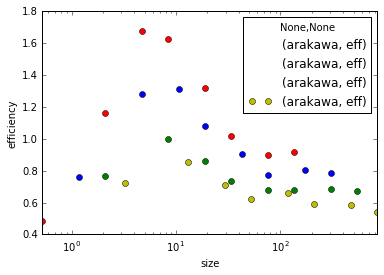

210.00531845846297

In [80]:
plt.figure
plotlist = [('arakawa','eff')]
stylelist = ['ro','bo','go','yo']
#efficiency.iloc[8:24].plot(x=('size',''),y=[('cg','eff'),('arakawa','eff')],style=['ro','bo'],logx=True)
ax = efficiency.iloc[0:8].plot(    x=('size',''),y=plotlist,style=stylelist[0],logx=True)
efficiency.iloc[8:16].plot(ax=ax,  x=('size',''),y=plotlist,style=stylelist[1],logx=True)
efficiency.iloc[16:24].plot(ax=ax, x=('size',''),y=plotlist,style=stylelist[2],logx=True)
efficiency.iloc[24:32].plot(ax=ax, x=('size',''),y=plotlist,style=stylelist[3],logx=True)
plt.ylabel('efficiency')
plt.xlabel('size')
plt.show()
base_bandwidth

In [74]:
efficiency.iloc[8:24]

,n,Nx,Ny,size,arakawa,pointwiseDot,axpby,dot,cg,scal,dx,dy,arakawa,pointwiseDot,axpby,dot,cg,scal,dx,dy
,,,,,eff,eff,eff,eff,eff,eff,eff,eff,bw,bw,bw,bw,bw,bw,bw,bw
8,3,128,128,1.18,0.31,1.06,0.53,0.07,0.23,0.41,0.02,0.28,147.33,497.22,246.44,31.44,108.05,189.56,7.83,132.89
9,3,256,256,4.72,0.41,2.10,1.52,0.16,0.35,1.09,0.32,0.42,189.57,980.69,709.86,75.13,163.06,510.53,147.73,194.36
10,3,384,384,10.62,0.45,0.85,1.93,0.21,0.43,1.96,0.41,0.46,211.70,397.87,902.71,97.14,203.19,919.46,191.98,217.11
11,3,512,512,18.87,0.42,0.73,1.45,0.21,0.44,2.26,0.37,0.31,195.07,342.69,679.36,97.91,204.45,1057.65,173.60,145.73
12,3,768,768,42.47,0.54,0.91,0.93,0.25,0.50,0.99,0.41,0.41,251.12,426.46,434.79,115.34,232.54,462.45,191.28,192.61
13,3,1024,1024,75.50,0.47,0.90,0.96,0.27,0.46,0.78,0.42,0.29,218.12,420.73,450.01,126.32,215.01,363.88,196.00,136.18
14,3,1536,1536,169.87,0.44,0.84,0.91,0.27,0.46,0.67,0.43,0.24,205.53,391.00,427.34,125.49,215.27,314.98,202.00,113.27
15,3,2048,2048,301.99,0.42,0.90,1.00,0.30,0.43,0.75,0.45,0.23,194.59,421.96,467.92,141.80,203.42,353.07,209.83,108.18
16,4,128,128,2.10,0.29,1.47,0.73,0.10,0.24,0.67,0.04,0.21,137.42,690.15,340.24,46.63,110.68,315.36,20.18,97.08
